In [0]:
!rm -rf eternal-learning

In [2]:
!git clone https://github.com/Dibakarroy1997/eternal-learning.git

Cloning into 'eternal-learning'...
remote: Counting objects: 15592, done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 15592 (delta 17), reused 37 (delta 11), pack-reused 15548
Receiving objects: 100% (15592/15592), 356.61 MiB | 39.98 MiB/s, done.
Resolving deltas: 100% (345/345), done.
Checking out files: 100% (20564/20564), done.


In [3]:
!ls 

datalab  eternal-learning


In [4]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
train_path = 'eternal-learning/Deep Learning/Keras/dataset/training_set'
valid_path = 'eternal-learning/Deep Learning/Keras/dataset/validation_set'

In [0]:
def plot(imgs, labels, row, col):
    fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(18, 5))

    count = 0

    for i in range(row):
        for j in range(col):
            axes[i][j].grid(False)
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
            axes[i][j].imshow(imgs[count])
            axes[i][j].set_title('cat' if (labels[count] == 0) else 'dog')
            count = count + 1

    plt.tight_layout()    

In [0]:
classifier = Sequential()

In [0]:
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3)))

In [0]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())

In [0]:
classifier.add(Dense(activation="relu", units=128))
classifier.add(Dense(activation="sigmoid", units=1))

In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory(valid_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

# train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(256, 256), classes=['cats', 'dogs'], batch_size=20)
# valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(256, 256), classes=['cats', 'dogs'], batch_size=10)
# test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(256, 256), classes=['cats', 'dogs'], batch_size=20)

Found 7800 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


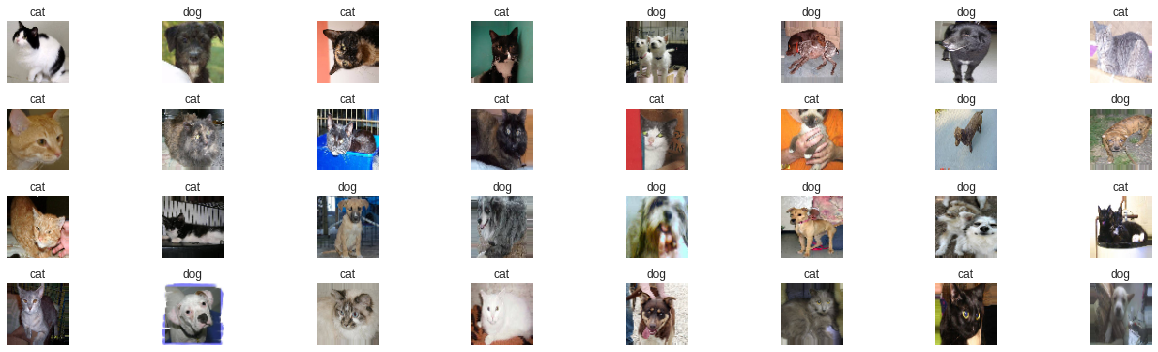

In [13]:
imgs, labels = next(training_set)
plot(imgs, labels, row=4, col=8)

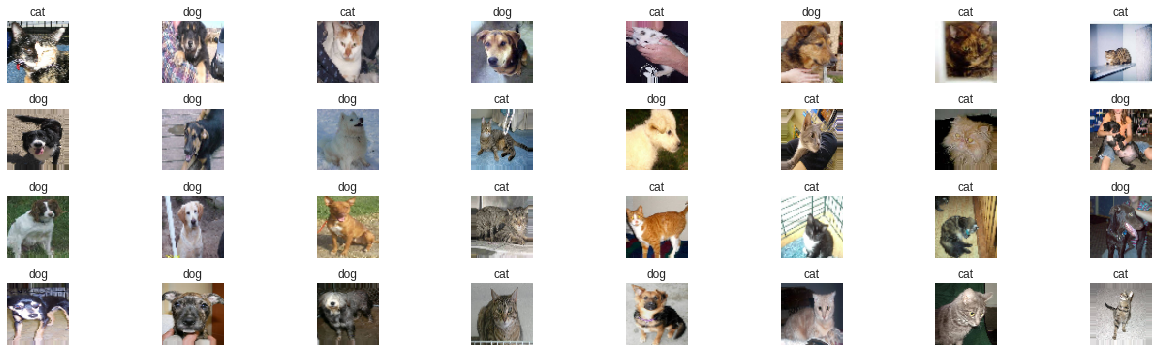

In [14]:
imgs, labels = next(training_set)
plot(imgs, labels, row=4, col=8)

In [15]:
classifier.fit_generator(training_set,
                         epochs = 25,
                         validation_data = validation_set,
                         validation_steps = 2000,
                         steps_per_epoch=244)

Epoch 1/25
244/244 [==============================] - 211s 864ms/step - loss: 0.6669 - acc: 0.5822 - val_loss: 0.6911 - val_acc: 0.5591
Epoch 2/25
244/244 [==============================] - 209s 856ms/step - loss: 0.6151 - acc: 0.6634 - val_loss: 0.5816 - val_acc: 0.7066
Epoch 3/25
 75/244 [========>.....................] - ETA: 20s - loss: 0.5910 - acc: 0.6850

244/244 [==============================] - 209s 855ms/step - loss: 0.5726 - acc: 0.6960 - val_loss: 0.5642 - val_acc: 0.7196
Epoch 4/25
244/244 [==============================] - 208s 854ms/step - loss: 0.5433 - acc: 0.7250 - val_loss: 0.5475 - val_acc: 0.7380
Epoch 5/25
107/244 [============>.................] - ETA: 17s - loss: 0.5291 - acc: 0.7374

244/244 [==============================] - 209s 857ms/step - loss: 0.5166 - acc: 0.7429 - val_loss: 0.5355 - val_acc: 0.7443
Epoch 6/25
244/244 [==============================] - 208s 851ms/step - loss: 0.4919 - acc: 0.7640 - val_loss: 0.5172 - val_acc: 0.7550
Epoch 7/25
113/244 [============>.................] - ETA: 16s - loss: 0.4790 - acc: 0.7674

244/244 [==============================] - 208s 853ms/step - loss: 0.4724 - acc: 0.7719 - val_loss: 0.6057 - val_acc: 0.7297
Epoch 8/25
244/244 [==============================] - 207s 850ms/step - loss: 0.4616 - acc: 0.7797 - val_loss: 0.4916 - val_acc: 0.7723
Epoch 9/25
114/244 [=============>................] - ETA: 16s - loss: 0.4248 - acc: 0.7945

244/244 [==============================] - 208s 852ms/step - loss: 0.4339 - acc: 0.7961 - val_loss: 0.4924 - val_acc: 0.7725
Epoch 10/25
244/244 [==============================] - 209s 855ms/step - loss: 0.4119 - acc: 0.8103 - val_loss: 0.5012 - val_acc: 0.7765
Epoch 11/25
114/244 [=============>................] - ETA: 16s - loss: 0.3908 - acc: 0.8221

244/244 [==============================] - 207s 850ms/step - loss: 0.3929 - acc: 0.8163 - val_loss: 0.5111 - val_acc: 0.7713
Epoch 12/25
244/244 [==============================] - 208s 853ms/step - loss: 0.3673 - acc: 0.8329 - val_loss: 0.4900 - val_acc: 0.7885
Epoch 13/25
113/244 [============>.................] - ETA: 16s - loss: 0.3476 - acc: 0.8493

244/244 [==============================] - 207s 850ms/step - loss: 0.3497 - acc: 0.8481 - val_loss: 0.5247 - val_acc: 0.7773
Epoch 14/25
244/244 [==============================] - 207s 849ms/step - loss: 0.3322 - acc: 0.8564 - val_loss: 0.5499 - val_acc: 0.7704
Epoch 15/25
114/244 [=============>................] - ETA: 16s - loss: 0.2985 - acc: 0.8720

244/244 [==============================] - 208s 852ms/step - loss: 0.3064 - acc: 0.8735 - val_loss: 0.5751 - val_acc: 0.7635
Epoch 16/25
244/244 [==============================] - 208s 853ms/step - loss: 0.2869 - acc: 0.8806 - val_loss: 0.5905 - val_acc: 0.7537
Epoch 17/25
114/244 [=============>................] - ETA: 16s - loss: 0.2517 - acc: 0.8969

244/244 [==============================] - 208s 851ms/step - loss: 0.2634 - acc: 0.8879 - val_loss: 0.5555 - val_acc: 0.7760
Epoch 18/25
244/244 [==============================] - 206s 845ms/step - loss: 0.2495 - acc: 0.8985 - val_loss: 0.6189 - val_acc: 0.7717
Epoch 19/25
114/244 [=============>................] - ETA: 16s - loss: 0.2157 - acc: 0.9126

244/244 [==============================] - 208s 851ms/step - loss: 0.2312 - acc: 0.9057 - val_loss: 0.6216 - val_acc: 0.7658
Epoch 20/25
244/244 [==============================] - 208s 854ms/step - loss: 0.2256 - acc: 0.9064 - val_loss: 0.6395 - val_acc: 0.7666
Epoch 21/25
115/244 [=============>................] - ETA: 16s - loss: 0.1844 - acc: 0.9274

244/244 [==============================] - 209s 855ms/step - loss: 0.1989 - acc: 0.9200 - val_loss: 0.6332 - val_acc: 0.7851
Epoch 22/25
244/244 [==============================] - 208s 851ms/step - loss: 0.1926 - acc: 0.9234 - val_loss: 0.6486 - val_acc: 0.7805
Epoch 23/25
115/244 [=============>................] - ETA: 15s - loss: 0.1722 - acc: 0.9361

244/244 [==============================] - 209s 855ms/step - loss: 0.1797 - acc: 0.9314 - val_loss: 0.6796 - val_acc: 0.7880
Epoch 24/25
244/244 [==============================] - 208s 853ms/step - loss: 0.1765 - acc: 0.9322 - val_loss: 0.6947 - val_acc: 0.7740
Epoch 25/25
115/244 [=============>................] - ETA: 16s - loss: 0.1630 - acc: 0.9397

244/244 [==============================] - 207s 848ms/step - loss: 0.1638 - acc: 0.9376 - val_loss: 0.7566 - val_acc: 0.7779


In [16]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [17]:
classifier.get_weights()

[array([[[[-3.45493145e-02,  2.20369190e-01, -1.13618910e-01,
           -1.14937145e-02, -4.11479622e-02, -1.69716328e-01,
           -1.35515615e-01, -7.77954683e-02,  6.20815195e-02,
            1.05549783e-01,  1.77310705e-01,  6.78952597e-03,
           -7.91596919e-02, -7.34254532e-03, -1.27208337e-01,
           -2.39296965e-02, -9.52287391e-02, -1.92803189e-01,
            8.98387358e-02,  2.52824631e-02, -1.60720944e-01,
            8.78038164e-03, -8.26294422e-02,  1.86983898e-01,
            1.69661820e-01,  1.27556071e-01, -5.56640849e-02,
           -1.22898687e-02, -1.33138299e-01,  1.44244656e-01,
           -2.19557524e-01, -4.06539859e-03],
          [ 6.11437857e-02,  3.96395996e-02,  7.88663179e-02,
            6.46067336e-02, -6.87482581e-02, -4.55104373e-02,
           -2.94905226e-03,  9.78597030e-02,  2.02504456e-01,
            3.98731269e-02,  1.25176176e-01, -4.30973507e-02,
           -1.20019227e-01,  6.43756390e-02, -4.31553014e-02,
           -5.49303368e-

In [18]:
classifier.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 64, 64, 3),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 32,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (3, 3),
   'name': 'conv2d_1',
   'padding': 'valid',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'MaxPooling2D',
  'config': {'data_format': 'channels_last',
   'name': 'max_pooling2d_1',
   'padding': 'valid',
   'pool_size': (2, 2),
   'strides': (2, 2),
   'trainable': True}},
 {'class_name': 'Conv2D',
  'config': {'activation': 'relu',
   'activity

In [0]:
classifier.save('cats_and_dogs.h5')

In [0]:
# save as JSON
json_string = classifier.to_json()

# save as YAML
yaml_string = classifier.to_yaml()

In [21]:
json_string

'{"class_name": "Sequential", "config": [{"class_name": "Conv2D", "config": {"name": "conv2d_1", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_1", "trainable": true, "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "data_format": "channels_last"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_2", "trainable": true, "filters": 32, "kernel_size": [3, 3], "strides": [1

In [22]:
print(yaml_string)

backend: tensorflow
class_name: Sequential
config:
- class_name: Conv2D
  config:
    activation: linear
    activity_regularizer: null
    batch_input_shape: !!python/tuple [null, 64, 64, 3]
    bias_constraint: null
    bias_initializer:
      class_name: Zeros
      config: {}
    bias_regularizer: null
    data_format: channels_last
    dilation_rate: &id002 !!python/tuple [1, 1]
    dtype: float32
    filters: 32
    kernel_constraint: null
    kernel_initializer:
      class_name: VarianceScaling
      config: {distribution: uniform, mode: fan_avg, scale: 1.0, seed: null}
    kernel_regularizer: null
    kernel_size: !!python/tuple [3, 3]
    name: conv2d_1
    padding: valid
    strides: &id003 !!python/tuple [1, 1]
    trainable: true
    use_bias: true
- class_name: MaxPooling2D
  config:
    data_format: channels_last
    name: max_pooling2d_1
    padding: valid
    pool_size: &id001 !!python/tuple [2, 2]
    strides: *id001
    trainable: true
- class_name: Conv2D
  config:


In [0]:
from google.colab import files
files.download('cats_and_dogs.h5')

In [0]:
from keras.models import load_model
classifier = load_model('eternal-learning/Deep Learning/Keras/cats_and_dogs.h5')

In [25]:
test_path = 'eternal-learning/Deep Learning/Keras/dataset/test_set'
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64, 64),
                                            batch_size = 200,
                                            class_mode = 'binary')

Found 200 images belonging to 2 classes.


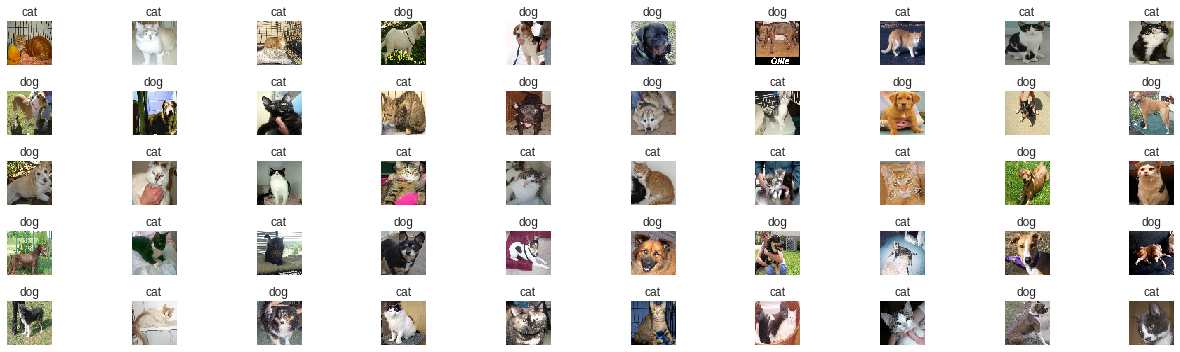

In [26]:
imgs, labels = next(test_set)
plot(imgs, labels, row=5, col=10)

In [27]:
labels

array([0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.], dtype=float32)

In [0]:
predictions = classifier.predict_generator(test_set, steps=1, verbose=0)

In [29]:
np.round(predictions*100, decimals=1)

array([[  0. ],
       [  0.1],
       [ 25.7],
       [100. ],
       [ 91.9],
       [ 99.9],
       [ 95.9],
       [ 99.4],
       [ 77.1],
       [ 12.8],
       [100. ],
       [ 99.9],
       [  0.1],
       [ 83.1],
       [ 93.8],
       [ 95.4],
       [  4.6],
       [ 99.9],
       [ 13.1],
       [ 99.4],
       [ 11.4],
       [ 63.6],
       [  0.4],
       [  1.7],
       [ 16. ],
       [  0. ],
       [ 98. ],
       [  2. ],
       [100. ],
       [ 48.9],
       [ 73.6],
       [  0. ],
       [  1.3],
       [ 21.8],
       [ 30.1],
       [ 99.6],
       [ 99.8],
       [ 91.1],
       [ 96.3],
       [ 98.3],
       [100. ],
       [ 10.3],
       [ 97. ],
       [ 92.6],
       [  0. ],
       [  1.7],
       [ 19.6],
       [  0.5],
       [ 51.8],
       [ 78. ],
       [ 96.6],
       [ 84.8],
       [ 41.8],
       [  0. ],
       [ 99.9],
       [ 57.5],
       [ 95.6],
       [  0. ],
       [ 97.7],
       [  0.1],
       [  0.1],
       [ 88.3],
       [

In [30]:
np.round(predictions[:, 0])

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.], dtype=float32)

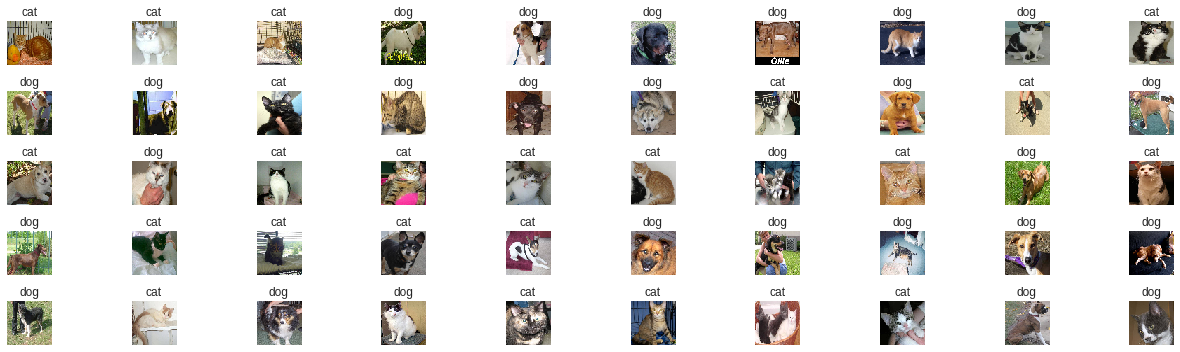

In [31]:
plot(imgs, np.round(predictions[:, 0]), row=5, col=10)

In [0]:
# source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
cm = confusion_matrix(labels, np.round(predictions[:, 0]))
cm

array([[75, 25],
       [19, 81]])

Confusion matrix, without normalization
[[75 25]
 [19 81]]


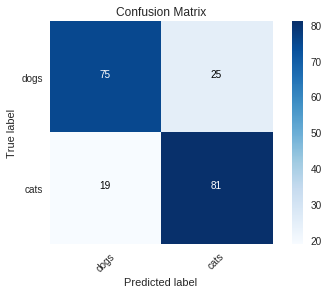

In [34]:
cm_plot_labels = ['dogs','cats']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [35]:
# Accuracy: Overall, how often is the classifier correct? (TP+TN)/total

print('Overall accuracy:', str((cm[0][0] + cm[1][1])/np.sum(cm) * 100) + '%')

Overall accuracy: 78.0%


In [0]:
import